# IMDB Sentiment Analysis (RNN)

## Python Libraries

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN, Dense, Activation

import warnings
warnings.filterwarnings("ignore")

## Data Import

In [93]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(path="imdb.npz",
              num_words=None,
              skip_top=0,
              maxlen=None,
              seed=113,
              start_char=1,
              oov_char=2,
              index_from=3)

In [94]:
print("Type: ",type(X_train))

Type:  <class 'numpy.ndarray'>


In [95]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (25000,)
y_train Shape:  (25000,)
X_test Shape:  (25000,)
y_test Shape:  (25000,)


## EDA

In [96]:
print("Y train values: ",np.unique(y_train))
print("Y test values: ",np.unique(y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [97]:
unique, counts = np.unique(y_train,return_counts=True)
print("Y train distribution: ",dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [98]:
unique, counts = np.unique(y_test,return_counts=True)
print("Y train distribution: ",dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y Test')

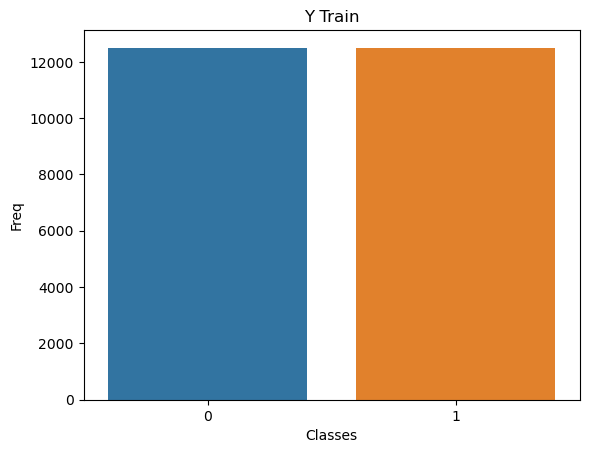

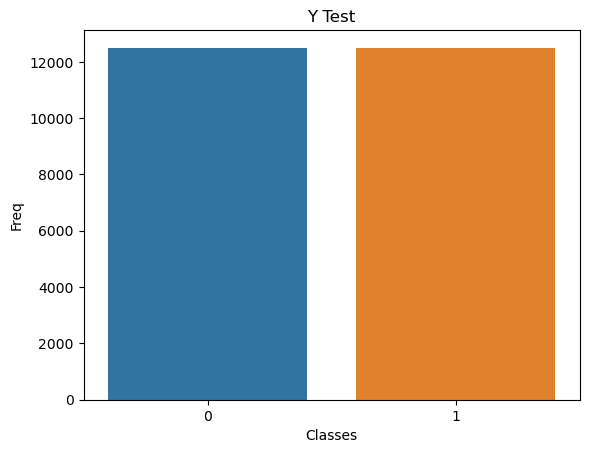

In [99]:
plt.figure()
y_train_df = pd.DataFrame(y_train, columns=['Classes'])
sns.countplot(x='Classes', data=y_train_df)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y Train")

plt.figure()
y_test_df = pd.DataFrame(y_test, columns=['Classes'])
sns.countplot(x='Classes', data=y_test_df)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y Test")

In [100]:
d=X_train[0]
print(d)
print()
print(len(d))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

218


In [101]:
review_len_train=[]
review_len_test=[]
for i,ii in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

Train mean: 238.71364
Train median: 178.0
Train mean: ModeResult(mode=array([132]), count=array([196]))


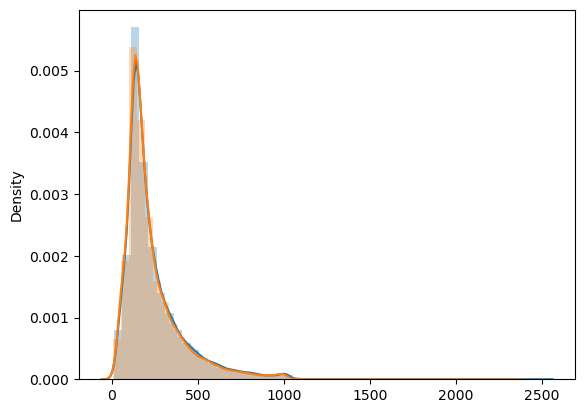

In [102]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3})
sns.distplot(review_len_test,hist_kws={"alpha":0.3})

print("Train mean:",np.mean(review_len_train))
print("Train median:",np.median(review_len_train))
print("Train mean:",stats.mode(review_len_train))

In [103]:
# number of words
word_index=imdb.get_word_index()
print(type(word_index))

<class 'dict'>


In [104]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [105]:
print(len(word_index))

88584


In [106]:
for keys,values in word_index.items():
    if values==1:
        print(keys)

the


In [107]:
def whatItSay(index=24):
    reverse_index=dict([(value,key)for (key,value) in word_index.items()])
    decode_review= " ".join([reverse_index.get(i-3,"!") for i in X_train[index]])
    print(decode_review)
    print(y_train[index])
    return decode_review

In [108]:
decoded_review=whatItSay()

! the original demille movie was made in 1938 with frederic march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring yul brynner he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once
1


## Preprocess

In [109]:
num_words=15000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=num_words)

In [110]:
maxlen=130
X_train=pad_sequences(X_train,maxlen=maxlen)
X_test=pad_sequences(X_test,maxlen=maxlen)

In [111]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [112]:
decoded_review=whatItSay()

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! the original demille movie was made in 1938 with ! march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring ! brynner he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once
1


 ## RNN

In [113]:
rnn=Sequential()
rnn.add(Embedding(num_words,32,input_length=maxlen))
rnn.add(SimpleRNN(16,input_shape=(num_words,maxlen),return_sequences=False,activation="relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [114]:
history=rnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128,verbose=1)

Epoch 1/5
196/196 [==============================] - 6s 29ms/step - loss: 0.5761 - accuracy: 0.6882 - val_loss: 0.7918 - val_accuracy: 0.6461
Epoch 2/5
196/196 [==============================] - 5s 28ms/step - loss: 0.3563 - accuracy: 0.8485 - val_loss: 0.5322 - val_accuracy: 0.8132
Epoch 3/5
196/196 [==============================] - 5s 28ms/step - loss: 0.2856 - accuracy: 0.8840 - val_loss: 0.3134 - val_accuracy: 0.8638
Epoch 4/5
196/196 [==============================] - 6s 28ms/step - loss: 0.2479 - accuracy: 0.8993 - val_loss: 0.3213 - val_accuracy: 0.8605
Epoch 5/5
196/196 [==============================] - 6s 29ms/step - loss: 0.2227 - accuracy: 0.9178 - val_loss: 0.3519 - val_accuracy: 0.8644


In [115]:
score=rnn.evaluate(X_test,y_test)
print("Accuracy: %",score[1]*100)

782/782 [==============================] - 4s 5ms/step - loss: 0.3519 - accuracy: 0.8644
Accuracy: % 86.44400238990784


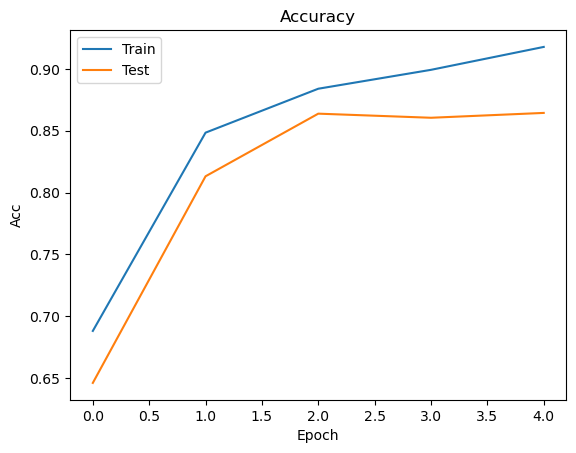

In [116]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

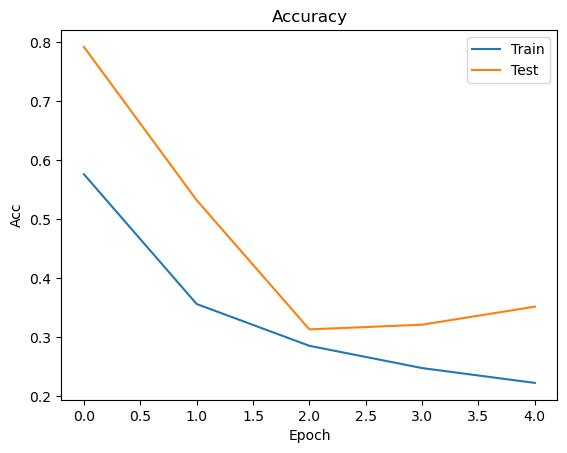

In [117]:
plt.figure()
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

## Conclusion

* The best result was observed in period 3 with a training accuracy score of 88% and a testing accuracy score of 86%. Overfitting occurred in epoch 4 and 5.